# 2. Indexing the Presentation Slides
To be able to match the best slides to the exam-like question later, we need to index the slides first. For this, the [byaldi](https://github.com/AnswerDotAI/byaldi) package is used. It uses poppler under hood, which also has to be installed in order to make this work. 

The byaldi package helps to create a multimodal RAG system, which can output us slides accordingly to their similarity to a text-query, i.e. a question.

In [1]:
pdf_files = "BIDS_pdfs"

In [2]:
from byaldi import RAGMultiModalModel

# Create instance of the Byaldi RAG Model
RAG = RAGMultiModalModel.from_pretrained(pretrained_model_name_or_path = "vidore/colpali-v1.2", device = "cpu")    # use device = 'cuda' if GPU is available to speed up the process (recommended)

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [3]:
# Now index all presentation slides and store it together with a representation of each slide
RAG.index(input_path=pdf_files, index_name="BIDS_index", store_collection_with_index=True, overwrite=True)    # Index will be saved together with base64 representation of slides

When successfully indexed, the model can also be fetched from the index file quite easily like this:

In [4]:
RAG = RAGMultiModalModel.from_index("BIDS_index", device='cpu')

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You are using in-memory collection. This means every image is stored in memory.
You might want to rethink this if you have a large collection!
Loaded 733 images from 2 JSON files.


Now, the model can be tested with an example query:

In [5]:
text_query = "What is the difference between instance and semantic segmentation?"

k_results = 4   # amount of slides that form the output
results = RAG.search(text_query, k=k_results)

In [6]:
from PIL import Image
import base64
from io import BytesIO

# Reconstruct the Images 
reconstructed_images = []

for result in results:
    base64_img = result["base64"]  
    image_data = base64.b64decode(base64_img)
    image = Image.open(BytesIO(image_data))
    reconstructed_images.append(image)

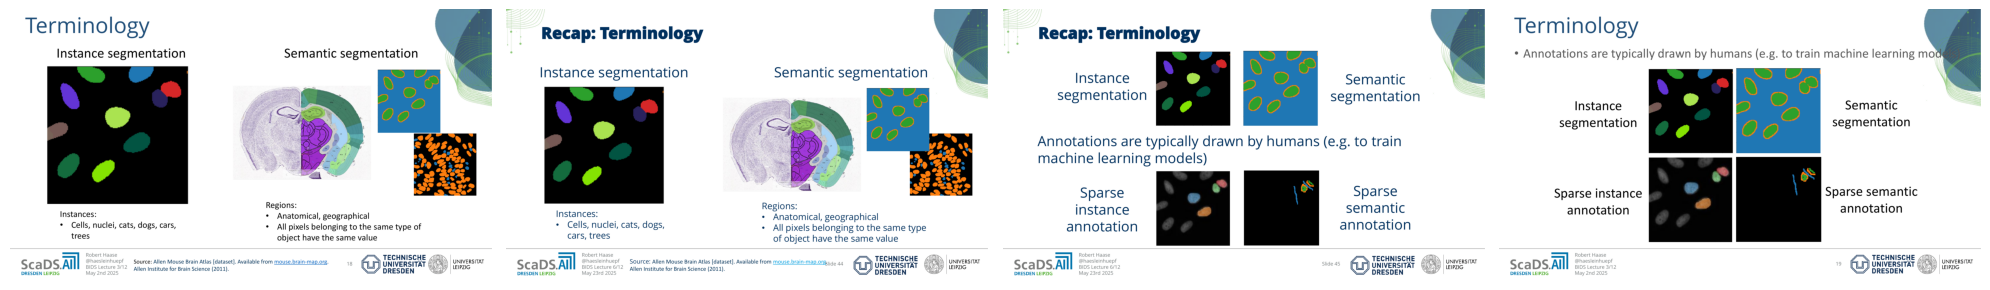

In [7]:
import matplotlib.pyplot as plt

# Visualize the Slides that best match to the query
fig, axes = plt.subplots(1, len(reconstructed_images), figsize=(20, 8))

for i, ax in enumerate(axes):
    ax.imshow(reconstructed_images[i])
    ax.axis("off")

plt.tight_layout()
plt.show()